# **LePHARE statistics**
A notebook for creating statistics on LePHARE results, including outliers and error factors

# 1. Initialisation

In [6]:
###Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
%matplotlib widget
# %matplotlib inline

###This notebook essentially uses the output catalog from zphota
base_dir = os.path.abspath(os.path.join(os.getcwd(), '..')) #change to your lephare base_dir
CAT_OUT = os.path.join(base_dir, 'output_data/TRAINING_CAT_flag.out') #output catalog directory

##Transform commented header into header for pandas dataframe
#extract header (line 47 in data file)
with open(CAT_OUT, "r") as f:
    lines = f.readlines()
    header_line = None
    for line in lines:
        if line.startswith("# IDENT  Z_BEST"): #line used for the header, always starts like this
            header_line = line
            break

#add header to column names
if header_line:
    column_names = header_line.strip("#").strip().split()

#displays data
zphota = pd.read_csv(CAT_OUT, sep='\s+', comment="#", header=None, names=column_names) #aphota dataframe
print(len(zphota))
print(list(zphota.columns.values))
zphota

<>:28: SyntaxWarning: invalid escape sequence '\s'
<>:28: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_63111/265982244.py:28: SyntaxWarning: invalid escape sequence '\s'
  zphota = pd.read_csv(CAT_OUT, sep='\s+', comment="#", header=None, names=column_names) #aphota dataframe


111171
['IDENT', 'Z_BEST', 'Z_BEST68_LOW', 'Z_BEST68_HIGH', 'Z_BEST99_LOW', 'Z_BEST99_HIGH', 'Z_MED', 'Z_MODE', 'CHI_BEST', 'MOD_BEST', 'EXTLAW_BEST', 'EBV_BEST', 'PDZ_BEST', 'SCALE_BEST', 'MAG_OBS0', 'MAG_OBS1', 'MAG_OBS2', 'MAG_OBS3', 'MAG_OBS4', 'MAG_OBS5', 'ERR_MAG_OBS0', 'ERR_MAG_OBS1', 'ERR_MAG_OBS2', 'ERR_MAG_OBS3', 'ERR_MAG_OBS4', 'ERR_MAG_OBS5', 'MAG_ABS0', 'MAG_ABS1', 'MAG_ABS2', 'MAG_ABS3', 'MAG_ABS4', 'MAG_ABS5', 'EMAG_ABS0', 'EMAG_ABS1', 'EMAG_ABS2', 'EMAG_ABS3', 'EMAG_ABS4', 'EMAG_ABS5', 'ZSPEC', 'PDZ_FLAG']


,IDENT,Z_BEST,Z_BEST68_LOW,Z_BEST68_HIGH,Z_BEST99_LOW,Z_BEST99_HIGH,Z_MED,Z_MODE,CHI_BEST,MOD_BEST,...,MAG_ABS4,MAG_ABS5,EMAG_ABS0,EMAG_ABS1,EMAG_ABS2,EMAG_ABS3,EMAG_ABS4,EMAG_ABS5,ZSPEC,PDZ_FLAG
0,4.0,0.008637,0.0081,0.0111,0.0000,0.0170,0.0098,0.0098,22.11820,45,...,-16.79835,-16.95716,1.40331,0.04648,0.02474,0.03105,0.01474,0.04439,0.03836,0
1,14.0,0.039120,0.0386,0.0410,0.0309,0.0464,0.0397,0.0399,12.05830,19,...,-19.97050,-20.26253,1.26020,0.18959,0.07640,0.19352,0.06550,0.13463,0.05831,0
2,18.0,0.091470,0.0884,0.0930,0.0795,0.1030,0.0910,0.0904,11.70380,89,...,-17.43598,-17.52678,1.00991,0.43988,0.21065,0.14688,0.03558,0.22488,0.06370,0
3,21.0,0.049190,0.0496,0.0503,0.0476,0.0517,0.0500,0.0500,226.55700,60,...,-17.60550,-17.67891,1.21457,0.23523,0.07880,0.26297,0.08896,0.15071,0.05901,0
4,22.0,0.055040,0.0499,0.0602,0.0491,0.0611,0.0553,0.0561,95.39390,93,...,-16.34597,-16.45018,1.16894,0.28085,0.09616,0.24348,0.10557,0.17063,0.06320,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111166,419668.0,1.878000,1.7876,1.9166,1.1321,2.0000,1.8626,1.8683,2.28937,16,...,-23.60436,-23.80517,0.45754,1.88992,2.76758,3.39452,3.72708,3.95881,1.90460,8
111167,419669.0,0.270400,0.1753,0.3608,0.0100,2.0000,0.8943,0.0146,2.33055,95,...,-14.42479,-14.54267,0.13836,0.08114,0.08885,-1.00000,-1.00000,-1.00000,1.90449,30
111168,419671.0,1.943000,0.2546,2.0000,0.0100,2.0000,0.4922,0.2731,1.85351,70,...,-21.19337,-21.29882,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.89492,26
111169,419672.0,1.114000,1.0051,1.2412,0.0100,2.0000,1.2512,1.1048,1.86124,60,...,-18.56587,-18.68906,0.24943,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.89138,15


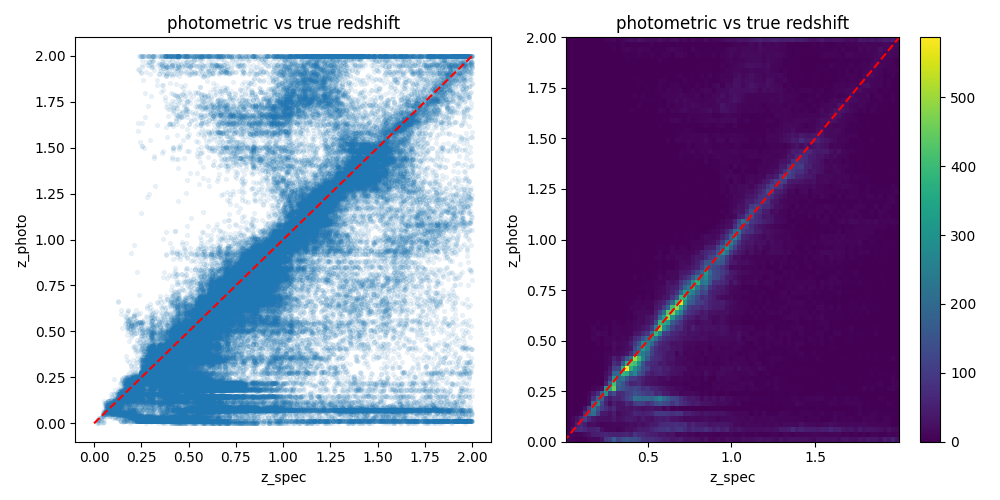

In [7]:
### First look at photometric redshift from output file
# flag_mask = zphota['PDZ_FLAG'] == 0# can apply flag mask if the ouput catalog has been pass through the pdz_flagger.py script
z_photo = zphota['Z_MODE']#[flag_mask] #computed photo z 
z_spec = zphota['ZSPEC']#[flag_mask] #initial "true" z


### z_spec vs z_phota
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(z_spec, z_photo, linewidth=0.3, s=10, alpha=0.1) #zz-plot


plt.plot([0, 2], [0, 2], 'r--') #1:1 scale line, corresponding to perfectly computed photometric redshift
plt.xlabel("z_spec")
plt.ylabel("z_photo")
plt.title("photometric vs true redshift")
# plt.grid(True)

###Color map
plt.subplot(122)
plt.hist2d(z_spec, z_photo, bins=80, cmap='viridis')
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_photo")
plt.title("photometric vs true redshift")
plt.colorbar()

plt.tight_layout()
plt.show()

Computed absolute magnitudes


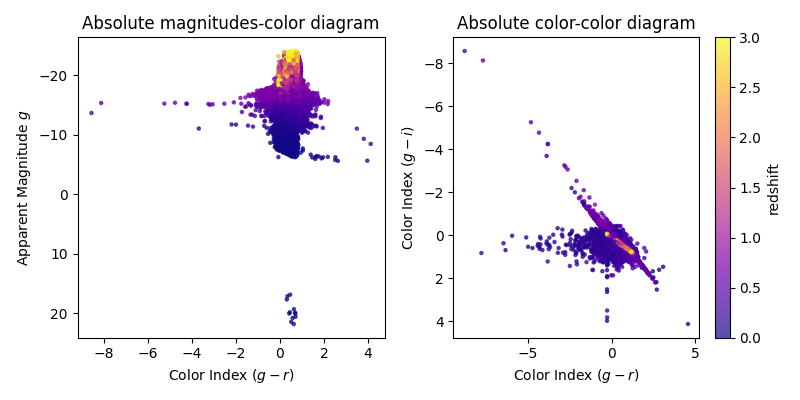

In [36]:
### plot magnitude
mag_mask = (zphota['MAG_ABS1']<100) & (zphota['MAG_ABS1']>-100) #mask for abberant compute/d abs magnitudes

plt.figure(figsize=(8,4))

plt.subplot(121)
plt.scatter(zphota['MAG_ABS1']-zphota['MAG_ABS2'],zphota['MAG_ABS1'],s=5, c=zphota['Z_BEST'], cmap="plasma", alpha=0.7)
plt.xlabel(r"Color Index $(g - r)$")
plt.ylabel(r"Apparent Magnitude $g$")
plt.title("Absolute magnitudes-color diagram")
plt.gca().invert_yaxis()

plt.subplot(122)
plt.scatter(zphota['MAG_ABS1']-zphota['MAG_ABS3'],zphota['MAG_ABS1']-zphota['MAG_ABS2'],s=5, c=zphota['Z_BEST'], cmap="plasma", alpha=0.7)
plt.xlabel(r"Color Index $(g - r)$")
plt.ylabel(r"Color Index $(g - i)$")
plt.gca().invert_yaxis()
plt.title("Absolute color-color diagram")

plt.colorbar(label="redshift")
plt.tight_layout()
plt.show()

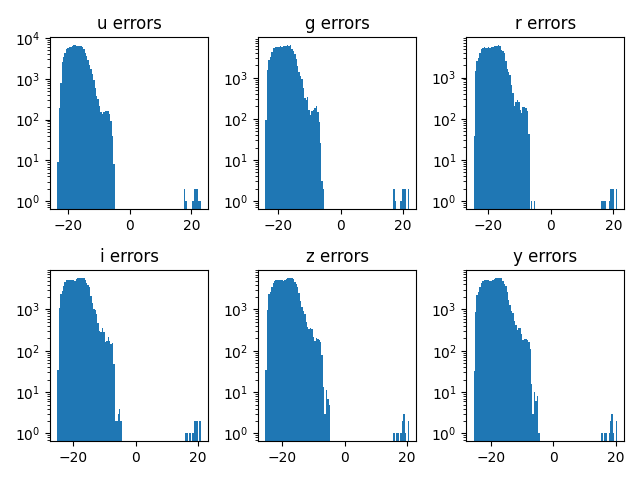

In [37]:
### Plot errors distribution for each filter
fig = plt.figure(constrained_layout=False) 

#gridspec is a way to set the dimension of a ''matrice'' of blank emplacement, to fill it later with graphics 
gs = fig.add_gridspec(2, 3) 

#plotting
MAG_OBSu = fig.add_subplot(gs[0, 0]) 
MAG_OBSu.hist(zphota['MAG_ABS0'], bins=100, log=True) 
plt.title('u errors')
MAG_OBSg = fig.add_subplot(gs[0, 1]) 
MAG_OBSg.hist(zphota['MAG_ABS1'], bins=100, log=True) 
plt.title('g errors')
MAG_OBSr = fig.add_subplot(gs[0, 2]) 
MAG_OBSr.hist(zphota['MAG_ABS2'], bins=100, log=True) 
plt.title('r errors')
MAG_OBSi = fig.add_subplot(gs[1, 0]) 
MAG_OBSi.hist(zphota['MAG_ABS3'], bins=100, log=True) 
plt.title('i errors')
MAG_OBSz = fig.add_subplot(gs[1, 1]) 
MAG_OBSz.hist(zphota['MAG_ABS4'], bins=100, log=True) 
plt.title('z errors')
MAG_OBSy = fig.add_subplot(gs[1, 2]) 
MAG_OBSy.hist(zphota['MAG_ABS5'], bins=100, log=True) 
plt.title('y errors')
plt.tight_layout()


Even though most of the photometric redshifts calculated with lephare approx° match the actual redshift, the z_phot vs z_spec plot clearly shows that many of the calculated redshifts do not. In particular, we can notice error areas on the zz-plot where the lephare redshifts seem to converge. The first step is to identify the sources of error using these areas.

# 2. First statistics on zphota photometric redshift and comparison with true redshfit

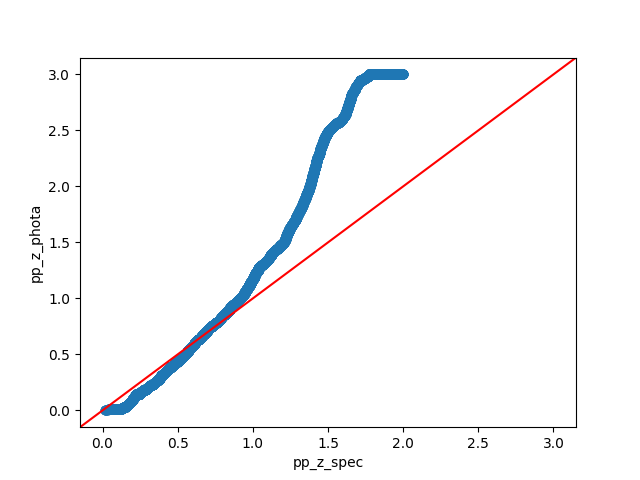

In [38]:
###QQ-2plot
#The better the qq-plot, the better the estimtion
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
pp_z_spec = sm.ProbPlot(zphota['ZSPEC']) #true redshift
pp_z_photo = sm.ProbPlot(zphota['Z_BEST']) #computed photometric redshift
qqplot_2samples(pp_z_spec, pp_z_photo,xlabel='pp_z_spec', ylabel='pp_z_phota', line="45")
plt.show()

/tmp/ipykernel_4887/3880272067.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4, 4))


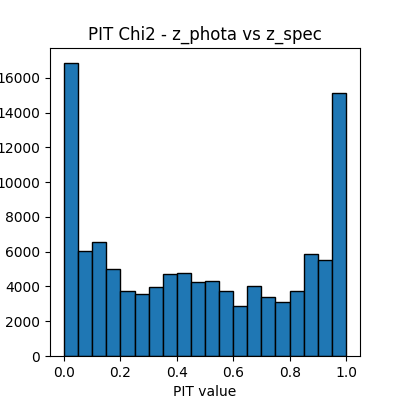

In [39]:
### PIT
import scipy.stats as stats

z_spec_df, z_spec_loc, z_spec_scale = stats.chi2.fit(z_spec)

pit_values = stats.chi2.cdf(z_photo, z_spec_df, loc=z_spec_loc, scale=z_spec_scale)

plt.figure(figsize=(4, 4))
plt.hist(pit_values, bins=20, edgecolor='black')
plt.title("PIT Chi2 - z_phota vs z_spec")
plt.xlabel("PIT value")
plt.ylabel("f")
plt.show()


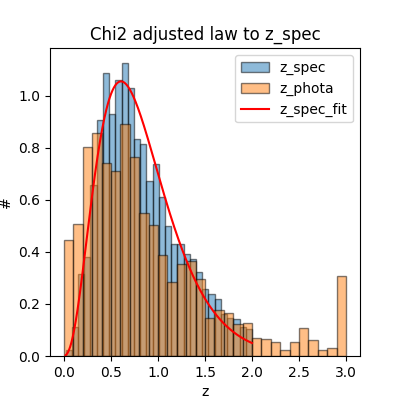

In [40]:
### histogram of zspecand ephoto distributions, seems to follow a Chi2 distribution
plt.figure(figsize=(4,4))
plt.hist(z_spec, bins=30, density=True, alpha=0.5, edgecolor='black', label='z_spec')
plt.hist(z_photo, bins=30, density=True, alpha=0.5, edgecolor='black', label='z_phota')

# fitting zspec
x = np.linspace(min(z_spec), max(z_spec), 1000)
z_spec_pdf = stats.chi2.pdf(x, z_spec_df, loc=z_spec_loc, scale=z_spec_scale)

# plot fitted zpsec
plt.plot(x, z_spec_pdf, 'r-', label='z_spec_fit')

# plot
plt.title("Chi2 adjusted law to z_spec")
plt.xlabel("z")
plt.ylabel("#")
plt.legend()
plt.show()


# Chi2 stats

First look at the fitting Chi2 computed during zphota run.

In [41]:
chi_best = zphota['CHI_BEST'] #Chi2 mask to apply when Chi2 set to error value 1e9
chi_best = chi_best[chi_best<40]#
# chi_best = chi_best[chi_best>0.1]

1.399355435225936 1.1638799999999998e-05 3.2104259342568278


/tmp/ipykernel_4887/32400577.py:19: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


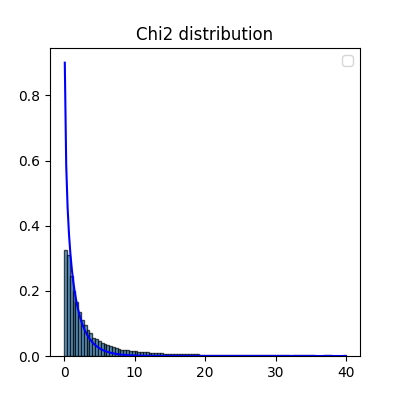

In [42]:
#Plot Chi hist
plt.figure(figsize=(4, 4))
plt.hist(chi_best, bins=100, alpha=0.7, edgecolor='black', density=True)#, log=True)
x = np.linspace(0.1, max(chi_best), 200)

#Chi
# chi_best_df, chi_best_loc, chi_best_scale = stats.chi.fit(chi_best, scale=1)
# print(chi_best_df, chi_best_loc, chi_best_scale)
# chi_best_pdf = stats.chi.pdf(x, df = chi_best_df, loc=chi_best_loc, scale=chi_best_scale)
# plt.plot(x, chi_best_pdf, 'r-')

#Chi2
chi2_best_df, chi2_best_loc, chi2_best_scale = stats.chi2.fit(chi_best)
print(chi2_best_df, chi2_best_loc, chi2_best_scale)
chi2_best_pdf = stats.chi2.pdf(x, chi2_best_df, loc=chi2_best_loc, scale=1)
plt.plot(x, chi2_best_pdf, 'b-')

plt.title("Chi2 distribution")
plt.legend()
plt.show()

# Scale Best statistics

SCALE_BEST is the normalization factor that LePHARE applies to scale the template fluxes to match the observed photometry during the fitting process. 

It’s computed for each template redshift combination and tells you the best-fitting physical scaling (e.g., in terms of luminosity or stellar mass proxy, depending on the SED).

It will be used to isolate the zphoto asymptots under zphoto = ~0.33 (see error regions) 

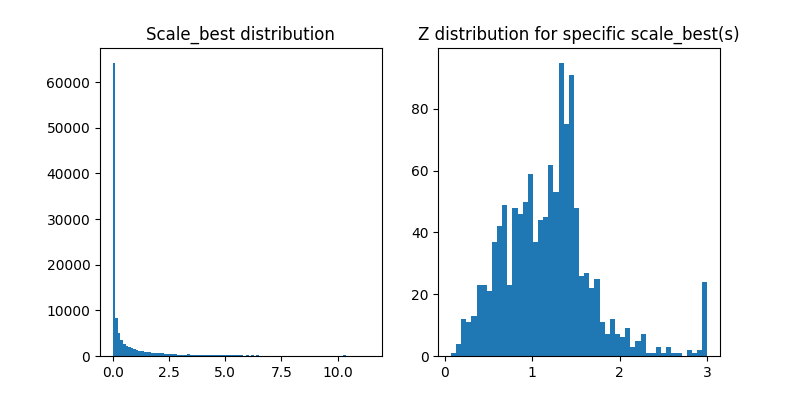

In [43]:
plt.figure(figsize=(8, 4))

# scale best hist
scale_best = zphota['SCALE_BEST']

plt.subplot(121)
plt.hist(scale_best, bins=100)
plt.title('Scale_best distribution')

#zspec hist for pecular scale_best
z_BEST_scale = zphota['Z_BEST'][(zphota['SCALE_BEST']<=0.33) & (zphota['SCALE_BEST']>=0.3)] 
plt.subplot(122)
plt.hist(z_BEST_scale, bins=50)
plt.title('Z distribution for specific scale_best(s)')

plt.show()

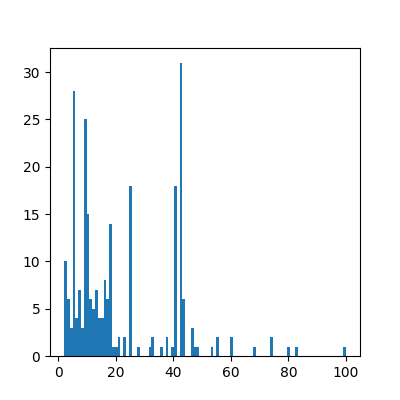

In [67]:
### mod used for a specific scale best

scale_mask = ((zphota['Z_BEST'] >= 2.546)) & ((zphota['Z_BEST'] <= 2.552))

plt.figure(figsize=(4, 4))
plt.hist(zphota['MOD_BEST'][scale_mask], bins=100)
plt.show()

In [45]:
scale_mask = [zphota['SCALE_BEST']>1]

# MOD_BEST statistics

The goal here is to seek for hypothetical "bad" SED(s) from the mag_gal library that could result into bad fitting results. For different error regions, we compute:

 - SED/redshitf grid VS error_flag and error_mag and relative badredshift/goodredshif
 - 

Text(0.5, 1.0, 'Scale_best distribution')

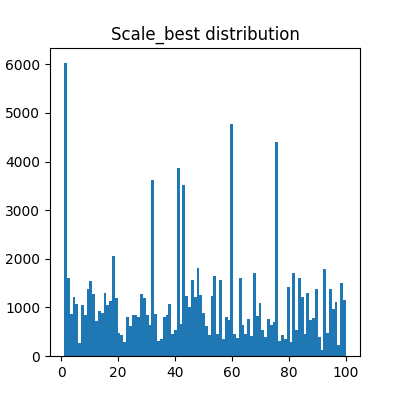

In [46]:
plt.figure(figsize=(4, 4))
# scale best hist
plt.subplot(111)
plt.hist(zphota['MOD_BEST'][zphota['MOD_BEST']>=0], bins=100)
plt.title('Scale_best distribution')

100


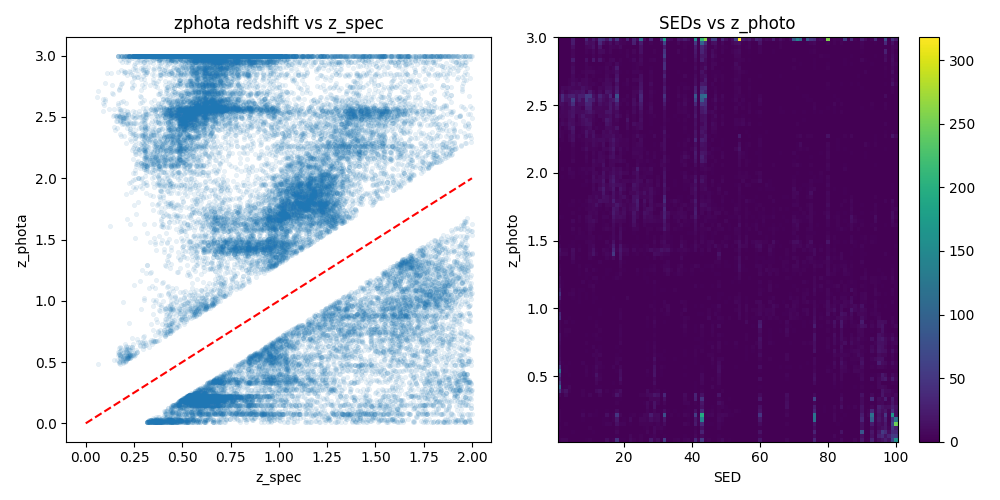

In [47]:
z_spec = zphota['ZSPEC'][zphota['MOD_BEST']>=0]
z_photo = zphota['Z_BEST'][zphota['MOD_BEST']>=0]
SED = zphota['MOD_BEST'][zphota['MOD_BEST']>=0]

good_mask = np.logical_not(abs(zphota['Z_BEST']-zphota['ZSPEC']) <0.3)

# ### z_spec vs z_phota
plt.figure(figsize=(10, 5))
plt.subplot(121)
###Color map
# plt.hist2d(SED, z_photo, bins=100, cmap='viridis')
# plt.xlabel("SED")
# plt.ylabel("z_photo")
# plt.title("SEDs vs z_photo")
# plt.colorbar()

plt.scatter(z_spec[good_mask], z_photo[good_mask], linewidth=0.3, s=10, alpha=0.1)
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")
# plt.grid(True)

###Color map
plt.subplot(122)
h = plt.hist2d(SED[good_mask], z_photo[good_mask], bins=(np.arange(0.5, 100.5 + 1, 1),100), cmap='viridis')
print(len(h[0].T[0]))
plt.xlabel("SED")
plt.ylabel("z_photo")
plt.title("SEDs vs z_photo")
plt.colorbar()
plt.tight_layout()
plt.show()

In [48]:
###it is possible to identify which SED tends to create degenerancies
#Create identifier
def find_bad_seds_from_hist(h, threshold=10):
    """
    h : sortie de plt.hist2d
    threshold : seuil minimal de counts dans un bin pour qu'un SED soit considéré "mauvais"
    
    Retourne : liste des indices SED (commençant à 1) où au moins un bin dépasse le seuil
    """
    zgrid = h[0].T  # shape (99, 100), donc zgrid[:, i] donne les z pour le ième SED
    bad_seds_mask = (zgrid >= threshold).any(axis=0)  # sur les z pour chaque SED
    bad_seds = np.where(bad_seds_mask)[0] + 1  # +1 pour commencer à 1
    return bad_seds.tolist()

bad_SEDs = find_bad_seds_from_hist(h, threshold=50)
print(bad_SEDs)


[1, 5, 9, 10, 16, 17, 18, 25, 32, 41, 43, 44, 46, 47, 53, 54, 70, 71, 72, 74, 75, 76, 80, 85, 90, 93, 96, 97, 99, 100]


100


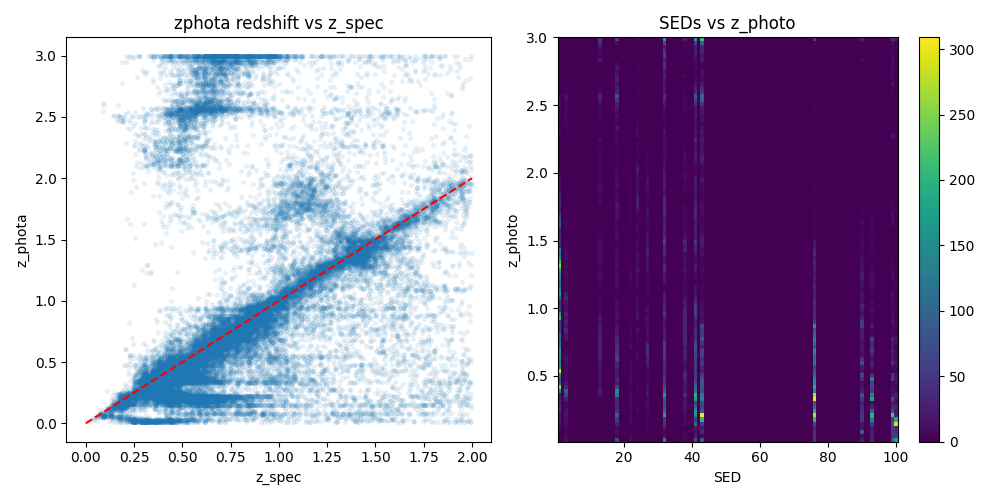

In [73]:
bad_SEDs_mask = zphota['MOD_BEST'].isin([1, 3, 13, 18, 22, 24, 27, 32, 38, 41, 43, 76, 90, 93, 99, 100])
z_spec = zphota['ZSPEC'][bad_SEDs_mask]
z_photo = zphota['Z_BEST'][bad_SEDs_mask]

# ### z_spec vs z_phota
plt.figure(figsize=(10, 5))
plt.subplot(121)
###Color map
# plt.hist2d(SED, z_photo, bins=100, cmap='viridis')
# plt.xlabel("SED")
# plt.ylabel("z_photo")
# plt.title("SEDs vs z_photo")
# plt.colorbar()

plt.scatter(z_spec, z_photo, linewidth=0.3, s=10, alpha=0.1)
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")
# plt.grid(True)

###Color map
plt.subplot(122)
h = plt.hist2d(zphota['MOD_BEST'][bad_SEDs_mask], z_photo, bins=(np.arange(0.5, 100.5 + 1, 1),100), cmap='viridis')
print(len(h[0].T[0]))
plt.xlabel("SED")
plt.ylabel("z_photo")
plt.title("SEDs vs z_photo")
plt.colorbar()
plt.tight_layout()
plt.show()

# Analysis on obs_error_mag


When looking at the spectra PDF resulting from zphota (using the spec.py script in lephare_data), we notice a zbest degenerancy growing quickly with observed error magnitudes. Thus we expect these error as being the main source of computed photometric degenerancies. We'll lead a few satistic on this error to validate our hypothesis. 

In [50]:
zphota[['MAG_OBS0', 'MAG_OBS1', 'MAG_OBS2', 'MAG_OBS3', 'MAG_OBS4', 'MAG_OBS5',
 'ERR_MAG_OBS0', 'ERR_MAG_OBS1', 'ERR_MAG_OBS2', 'ERR_MAG_OBS3', 'ERR_MAG_OBS4', 'ERR_MAG_OBS5']]

,MAG_OBS0,MAG_OBS1,MAG_OBS2,MAG_OBS3,MAG_OBS4,MAG_OBS5,ERR_MAG_OBS0,ERR_MAG_OBS1,ERR_MAG_OBS2,ERR_MAG_OBS3,ERR_MAG_OBS4,ERR_MAG_OBS5
0,17.831,16.908,16.443,16.210,16.061,15.873,0.005,0.005,0.005,0.005,0.005,0.005
1,19.073,17.745,16.979,16.529,16.255,15.953,0.005,0.005,0.005,0.005,0.005,0.005
2,21.638,21.011,20.829,20.628,20.655,20.528,0.007,0.005,0.005,0.005,0.005,0.006
3,20.547,19.554,19.239,19.057,19.089,18.987,0.006,0.005,0.005,0.005,0.005,0.005
4,21.238,20.688,20.566,20.437,20.480,20.450,0.006,0.005,0.005,0.005,0.005,0.006
...,...,...,...,...,...,...,...,...,...,...,...,...
111166,27.088,26.391,25.845,25.428,24.383,23.850,0.471,0.091,0.045,0.049,0.045,0.083
111167,26.214,26.539,26.243,26.112,25.731,26.271,0.315,0.092,0.064,0.105,0.158,0.366
111168,26.475,26.171,25.738,25.606,25.152,25.294,0.239,0.065,0.044,0.067,0.100,0.251
111169,28.150,27.449,26.959,26.595,25.571,25.717,0.857,0.213,0.114,0.135,0.132,0.242


47229


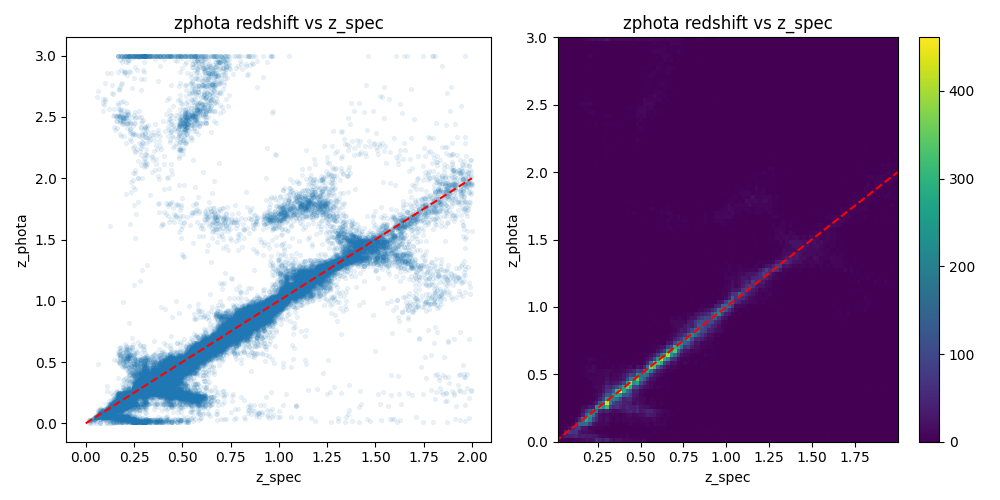

In [75]:
# redshift from output file
# mag_mask = (zphota['MAG_ABS1']<100) & (zphota['MAG_ABS1']>-100)
error_mask = (zphota['ERR_MAG_OBS2'] <= 0.05)
z_phota = zphota['Z_BEST'][error_mask]
z_spec = zphota['ZSPEC'][error_mask]
print(len(z_spec))

### z_spec vs z_phota
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(z_spec, z_phota, linewidth=0.3, s=10, alpha=0.1)
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")
# plt.grid(True)

###Color map
plt.subplot(122)
plt.hist2d(z_spec, z_phota, bins=100)
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")
plt.colorbar()

plt.tight_layout()
plt.show()

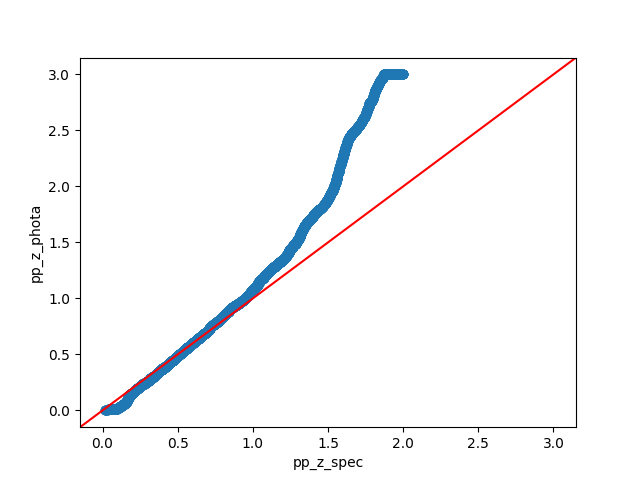

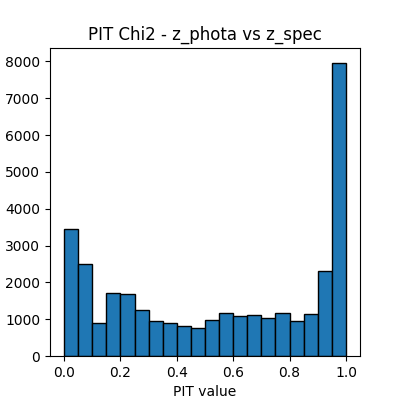

In [52]:
###qqplot and pit values

##QQ-2plot
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot_2samples
pp_z_spec = sm.ProbPlot(zphota['ZSPEC'][error_mask]) #true redshift
pp_z_photo = sm.ProbPlot(zphota['Z_BEST'][error_mask]) #computed photometric redshift
qqplot_2samples(pp_z_spec, pp_z_photo,xlabel='pp_z_spec', ylabel='pp_z_phota', line="45")
plt.show()

##PIT
import scipy.stats as stats

z_spec_df, z_spec_loc, z_spec_scale = stats.chi2.fit(z_spec)

pit_values = stats.chi2.cdf(z_photo, z_spec_df, loc=z_spec_loc, scale=z_spec_scale)

plt.figure(figsize=(4, 4))
plt.hist(pit_values, bins=20, edgecolor='black')
plt.title("PIT Chi2 - z_phota vs z_spec")
plt.xlabel("PIT value")
plt.ylabel("f")
plt.show()

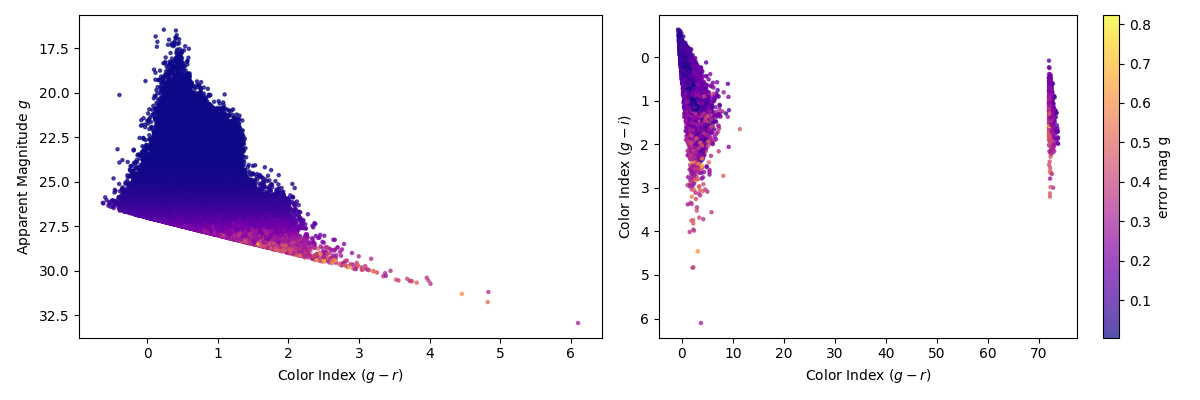

In [53]:
### plot magnitude
mag_mask = (zphota['MAG_OBS2']<50) & (zphota['MAG_OBS2']>0) & (zphota['MAG_OBS3']<50)

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.scatter(zphota['MAG_OBS2'][mag_mask]-zphota['MAG_OBS3'][mag_mask],zphota['MAG_OBS2'][mag_mask],s=5, c=zphota['ERR_MAG_OBS2'][mag_mask], cmap="plasma", alpha=0.7)
plt.xlabel(r"Color Index $(g - r)$")
plt.ylabel(r"Apparent Magnitude $g$")
# plt.xlim((-5,10))
# plt.ylim((15,40))
plt.gca().invert_yaxis()

plt.subplot(122)
plt.scatter(zphota['MAG_OBS1'][mag_mask]-zphota['MAG_OBS3'][mag_mask],zphota['MAG_OBS2'][mag_mask]-zphota['MAG_OBS3'][mag_mask],s=5, c=zphota['ERR_MAG_OBS2'][mag_mask], cmap="plasma", alpha=0.7)
plt.xlabel(r"Color Index $(g - r)$")
plt.ylabel(r"Color Index $(g - i)$")
# plt.xlim((-5,12))
# plt.ylim((-2.5,12))
plt.gca().invert_yaxis()


plt.colorbar(label="error mag g")
plt.tight_layout()
plt.show()

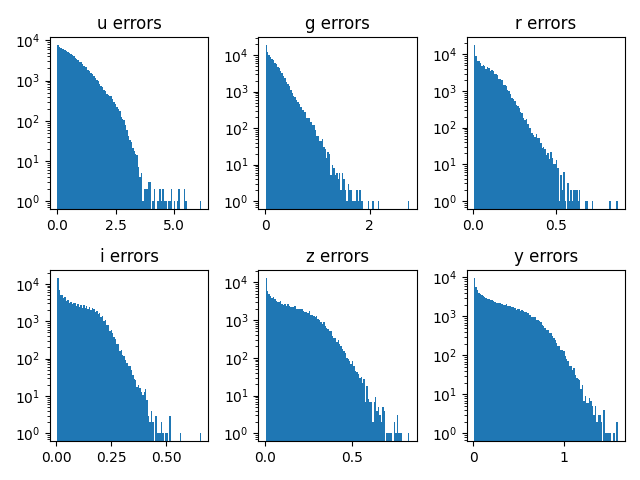

In [54]:
### Plot errors distribution for each filter
fig = plt.figure(constrained_layout=False) 

#gridspec is a way to set the dimension of a ''matrice'' of blank emplacement, to fill it later with graphics 
gs = fig.add_gridspec(2, 3) 

#plotting
MAG_OBSu = fig.add_subplot(gs[0, 0]) 
MAG_OBSu.hist(zphota['ERR_MAG_OBS0'], bins=100, log=True) 
plt.title('u errors')
MAG_OBSg = fig.add_subplot(gs[0, 1]) 
MAG_OBSg.hist(zphota['ERR_MAG_OBS1'], bins=100, log=True) 
plt.title('g errors')
MAG_OBSr = fig.add_subplot(gs[0, 2]) 
MAG_OBSr.hist(zphota['ERR_MAG_OBS2'], bins=100, log=True) 
plt.title('r errors')
MAG_OBSi = fig.add_subplot(gs[1, 0]) 
MAG_OBSi.hist(zphota['ERR_MAG_OBS3'], bins=100, log=True) 
plt.title('i errors')
MAG_OBSz = fig.add_subplot(gs[1, 1]) 
MAG_OBSz.hist(zphota['ERR_MAG_OBS4'], bins=100, log=True) 
plt.title('z errors')
MAG_OBSy = fig.add_subplot(gs[1, 2]) 
MAG_OBSy.hist(zphota['ERR_MAG_OBS5'], bins=100, log=True) 
plt.title('y errors')
plt.tight_layout()


# Error regions

**0-row**

In [55]:
###Create chi outlier list
chi_outliers = zphota[zphota['CHI_BEST'] >= 1e9]
#if CHI = 1e9, Z_BEST = 0
chi_outliers
#but x Z_BEST = 0 do not involves CHI_BEST=1e9

,IDENT,Z_BEST,Z_BEST68_LOW,Z_BEST68_HIGH,Z_BEST99_LOW,Z_BEST99_HIGH,Z_MED,Z_MODE,CHI_BEST,MOD_BEST,...,MAG_ABS3,MAG_ABS4,MAG_ABS5,EMAG_ABS0,EMAG_ABS1,EMAG_ABS2,EMAG_ABS3,EMAG_ABS4,EMAG_ABS5,ZSPEC


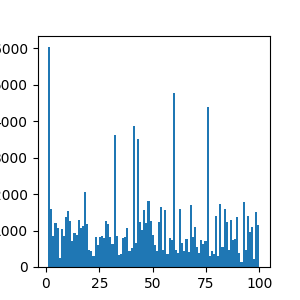

In [56]:
plt.figure(figsize=(3,3))
plt.hist(zphota['MOD_BEST'], bins=100)
plt.show()

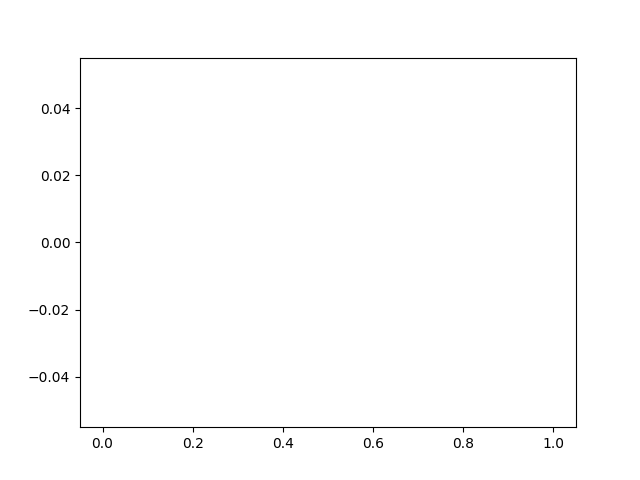

In [57]:
plt.figure()
plt.hist(chi_outliers['NBAND_USED'])
plt.show()

We see that when zhopta does not find a SED for a fit, it returns mod_best = -99 and chi_best =1e9. We identify catalog sources resulting in this error, but it is not enough : only 354/111171 sources are excluded, when ~30% of photometric redshifts do not match with the true redshifts from the training file.

**0 to 0.33 rows**

On fig.1, we see several asymptotes from 0 to ~0.33 (excluding the one = 0). Second step is to identify what parameter in OUTPUT_CAT allows to isolate those values. In **Scale_best statistics**, we notices that this parameter is a good way to exclude specific area of the zz-plot without affecting the others. 

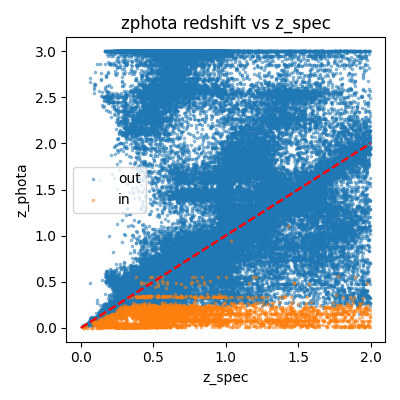

In [58]:
###Check scale outliers reduced zphota vs zspec
### z_spec vs z_phota

plt.figure(figsize=(4, 4))
##Out error region
mask_out = zphota['SCALE_BEST']>5e-4
z_phota_out = zphota['Z_BEST'][mask_out]
z_spec_out = zphota['ZSPEC'][mask_out]
plt.scatter(z_spec_out, z_phota_out, linewidth=0.3, s=5, alpha=0.5, label='out')
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")

##In error region
mask_in = zphota['SCALE_BEST']<5e-4
z_phota_in = zphota['Z_BEST'][mask_in]
z_spec_in = zphota['ZSPEC'][mask_in]
plt.scatter(z_spec_in, z_phota_in, linewidth=0.3, s=5, alpha=0.5,label='in')
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")

plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()

**2-row**

Identifying error source(s) resulting into these photometric redshifts topping at 2

In [59]:
z_photo2 = zphota[zphota['Z_BEST'] == 2]
z_photo2

,IDENT,Z_BEST,Z_BEST68_LOW,Z_BEST68_HIGH,Z_BEST99_LOW,Z_BEST99_HIGH,Z_MED,Z_MODE,CHI_BEST,MOD_BEST,...,MAG_ABS3,MAG_ABS4,MAG_ABS5,EMAG_ABS0,EMAG_ABS1,EMAG_ABS2,EMAG_ABS3,EMAG_ABS4,EMAG_ABS5,ZSPEC
3312,12494,2.0,1.7748,2.0631,1.3039,2.4932,2.0829,2.0194,6.095760,59,...,-22.45115,-22.56071,-22.67500,0.65712,2.10691,2.98457,3.61152,3.94407,4.17580,0.42231
39954,150488,2.0,1.9339,2.0703,0.9666,2.3889,1.9295,2.0068,1.612780,24,...,-22.92183,-23.10556,-23.29190,0.67699,2.12679,3.00444,3.63139,3.96395,4.19568,1.19411
43255,162639,2.0,1.7817,2.2647,0.0100,2.9557,1.9735,2.0459,0.359980,17,...,-22.31875,-22.52234,-22.72573,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.67523
49822,187368,2.0,1.0495,2.4131,0.0100,3.0000,1.9646,2.0219,0.457550,41,...,-21.67854,-21.79547,-21.92407,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,0.54361
61850,232904,2.0,1.9094,2.0445,1.2137,2.1363,1.9587,1.9728,4.846540,16,...,-23.48133,-23.68180,-23.88261,0.65712,2.10691,2.98457,3.61152,3.94407,4.17580,1.21673
65840,248124,2.0,1.1951,2.1528,0.9726,2.4547,1.9948,2.0127,0.143849,47,...,-22.13391,-22.26115,-22.39390,0.67699,2.12679,3.00444,3.63139,3.96395,4.19568,1.88143
83447,314679,2.0,1.1084,2.1601,0.2687,2.4378,1.7929,1.1202,1.472170,28,...,-22.30064,-22.47942,-22.66194,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.13316
84334,318070,2.0,1.9563,2.0417,1.1313,2.2637,1.9450,2.0038,5.383280,21,...,-23.38322,-23.56685,-23.75283,0.67699,2.12679,3.00444,3.63139,3.96395,4.19568,1.22720
86847,327654,2.0,1.7362,2.1883,0.0100,2.9621,1.8882,1.9807,1.207610,19,...,-21.93253,-22.22615,-22.50961,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.58833
106881,403265,2.0,1.6818,2.2224,0.0100,3.0000,1.9985,2.0794,2.302460,28,...,-21.81530,-21.99409,-22.17660,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,-1.00000,1.23227


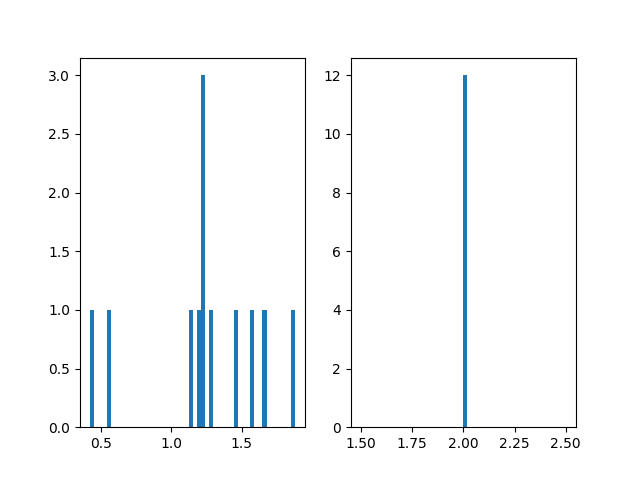

In [60]:
plt.figure()
plt.subplot(121)
plt.hist(z_photo2['ZSPEC'], bins=50)

plt.subplot(122)
plt.hist(z_photo2['Z_BEST'], bins=50)
plt.show()

In [61]:
z_photo2.to_csv('temp.csv', index=False)

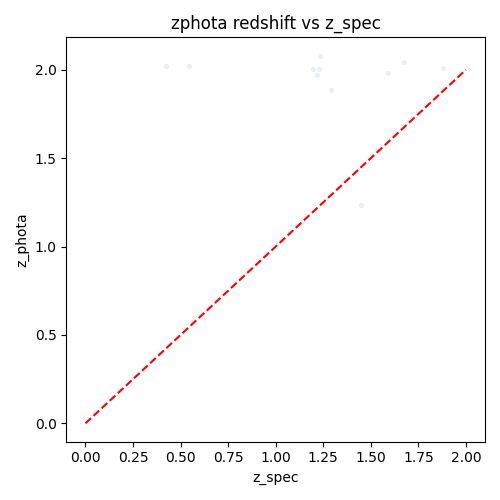

In [62]:
### z_spec vs z_phota
plt.figure(figsize=(5, 5))
plt.scatter(z_photo2['ZSPEC'], z_photo2['Z_MODE'], linewidth=0.3, s=10, alpha=0.1)
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")
# plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()

**1.75 square region**

A noticable error region is at (z_spec, z_best) = (1.15,1.75), where outlier values are contained within a square with sides of 0.4. 

In [63]:
# ### Test
# base_dir = '/home/hallouin/Documents/thall_2025/lephare/'
# CAT_OUT_175 = os.path.join(base_dir, 'docs/zphota_training/TRAINING_CAT_zbest175_noadapt.out')

# #extract header (line 47 in data file)
# with open(CAT_OUT_175, "r") as f:
#     lines = f.readlines()
#     header_line = None
#     for line in lines:
#         if line.startswith("# IDENT  Z_BEST"):
#             header_line = line
#             break

# #add header to column names
# if header_line:
#     column_names = header_line.strip("#").strip().split()

# #read data
# zphota175_bis = pd.read_csv(CAT_OUT_175, sep='\s+', comment="#", header=None, names=column_names)
# zphota175_bis

2601


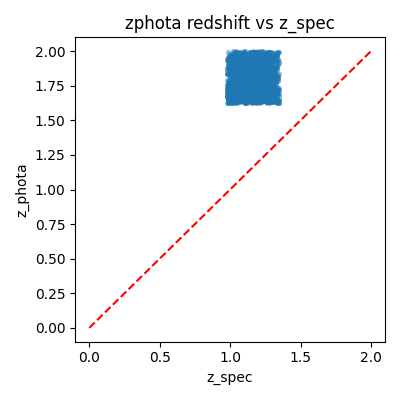

In [64]:
mask_in = (((zphota['ZSPEC'] > 0.978) & (zphota['ZSPEC'] < 1.35))
        & ((zphota['Z_BEST'] > 1.623) & (zphota['Z_BEST'] < 2)))
# mask_out = (((zphota['ZSPEC'] < 0.978) | (zphota['ZSPEC'] > 1.35))
#         | ((zphota['Z_BEST'] < 1.623) | (zphota['Z_BEST'] > 2)))
zphota175 = zphota[mask_in]
print(len(zphota175))

### z_spec vs z_phota
plt.figure(figsize=(4, 4))
plt.scatter(zphota175['ZSPEC'], zphota175['Z_BEST'], linewidth=0.3, s=10, alpha=0.5)
# plt.scatter(zphota175_bis['ZSPEC'], zphota175_bis['Z_BEST'], linewidth=0.3, s=10, alpha=0.5)
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_phota")
plt.title("zphota redshift vs z_spec")
# plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'mod distribution')

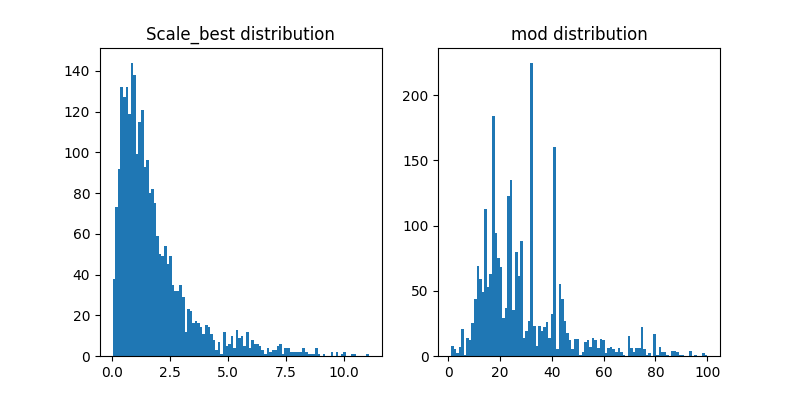

In [65]:
plt.figure(figsize=(8, 4))
# scale best hist
plt.subplot(121)
plt.hist(zphota175['SCALE_BEST'], bins=100)
plt.title('Scale_best distribution')

#zspec hist for pecular scale_best
plt.subplot(122)
plt.hist(zphota175['MOD_BEST'], bins=100)
plt.title('mod distribution')

# One mask to rule them all

For our dataset, we present our best mask using the data analysis gathered before

In [66]:
### Applying masks by cathegory
##from observed data
#magnitudes errors
emag_mask = (zphota['ERR_MAG_OBS1'] <= 0.5)

##from output catalog
#best_scales outliers
bestscale_mask = zphota['SCALE_BEST']>5e-4
#Chi2 outliers
chi2_mask = zphota['CHI_BEST']<100

##from pdz analysis
flag_mask = zphota['PDZ_FLAG']<=15

the_mask = emag_mask & bestscale_mask & chi2_mask & flag_mask

# redshift from output file
z_photo = zphota['Z_BEST'][the_mask]
z_spec = zphota['ZSPEC'][the_mask]
print(len(z_spec))

### z_spec vs z_phota
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.scatter(z_spec, z_photo, linewidth=0.3, s=10, alpha=0.1)
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_photo")
plt.title("zphota redshift vs z_spec")
# plt.grid(True)

###Color map
plt.subplot(122)
plt.hist2d(z_spec, z_photo, bins=80, cmap='viridis')
plt.plot([0, 2], [0, 2], 'r--')
plt.xlabel("z_spec")
plt.ylabel("z_photo")
plt.title("zphota redshift vs z_spec")
plt.colorbar()

plt.tight_layout()
plt.show()

KeyError: 'PDZ_FLAG'

# Saving a particular data set from CAT.out

In [ ]:
def masking_input_cat(masked_output_df, original_input_path, new_input_path):
    """
    Filters the INPUT.dat file using the IDENT values from a masked LePhare output DataFrame
    and writes the result to a new file.

    Parameters:
    - masked_output_df: pandas DataFrame with a column named 'IDENT'
    - original_input_path: str, path to the original INPUT.dat file
    - new_input_path: str, path where the filtered INPUT.dat will be saved
    """
    # Load original input file
    input_data = []
    with open(original_input_path, "r") as f:
        for line in f:
            input_data.append(line.strip())

    # Extract IDENTs from masked output
    idents_to_keep = set(masked_output_df["IDENT"].astype(float))
    ident_list=[]
    # Write new input file with only the matching IDENTs
    with open(new_input_path, "w") as f:
        for line in input_data:
            ident = float(line.split()[0])
            if ident in idents_to_keep:
                f.write(line + "\n")
    print(f"Filtered input written to: {new_input_path}")


In [ ]:
# Filter input file based on masked output
INPUT_CAT = '/home/hallouin/Documents/thall_2025/lephare/simulation_catalogs/buzzard_base/Final_Buzzard_training_file.dat'
filtered_INPUT_CAT = '/home/hallouin/Documents/thall_2025/lephare/simulation_catalogs/buzzard_base/zbest175_Buzzard_training_file.dat'
masking_input_cat(zphota175, INPUT_CAT, filtered_INPUT_CAT)
